In [1]:
import random
import time
import pandas as pd
from datetime import datetime
from datetime import date
import string
import re

In [2]:
data=pd.read_csv('Transactions_Total.csv')

In [3]:
data.head(10)

,Unnamed: 0,Type,Punk,From,To,Amount,Txn
0,0,Bid Withdrawn,0,0xe73a1d,NaN,321Ξ ($1.26M),"Sep 04, 2021"
1,1,Bid,0,0xe73a1d,NaN,321Ξ ($1.14M),"Sep 01, 2021"
2,2,Bid Withdrawn,0,0x2e5e22,NaN,320Ξ ($1.11M),"Sep 01, 2021"
3,3,Bid,0,0x2e5e22,NaN,320Ξ ($1.1M),"Sep 01, 2021"
4,4,Bid Withdrawn,0,0x2e5e22,NaN,"263Ξ ($904,481)","Sep 01, 2021"
5,5,Bid,0,0x2e5e22,NaN,"263Ξ ($849,714)","Aug 29, 2021"
6,6,Bid Withdrawn,0,0x983ace,NaN,250Ξ ($1.03M),"May 10, 2021"
7,7,Bid,0,0x983ace,NaN,"250Ξ ($537,615)","Apr 11, 2021"
8,8,Bid Withdrawn,0,0xd7510a,NaN,"100Ξ ($160,973)","Mar 03, 2021"
9,9,Bid,0,0xd7510a,NaN,"100Ξ ($188,897)","Feb 20, 2021"


In [4]:
from datetime import datetime
from datetime import date
import string

In [5]:
data = data.rename(columns={'Type': 'TypeTransaction','Punk': 'idCryptoPunk', 'Txn':'Date'})
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data=data.drop(['Unnamed: 0'], axis=1)

In [6]:
Split=data["Amount"].str.split('(', expand=True)
Split.head(1)

,0,1
0,321Ξ,$1.26M)


In [7]:
Split.columns = ['AmountETH', 'AmountDollar']
data = pd.concat([data, Split], axis=1)
data.head()

,TypeTransaction,idCryptoPunk,From,To,Amount,Date,AmountETH,AmountDollar
0,Bid Withdrawn,0,0xe73a1d,NaN,321Ξ ($1.26M),2021-09-04,321Ξ,$1.26M)
1,Bid,0,0xe73a1d,NaN,321Ξ ($1.14M),2021-09-01,321Ξ,$1.14M)
2,Bid Withdrawn,0,0x2e5e22,NaN,320Ξ ($1.11M),2021-09-01,320Ξ,$1.11M)
3,Bid,0,0x2e5e22,NaN,320Ξ ($1.1M),2021-09-01,320Ξ,$1.1M)
4,Bid Withdrawn,0,0x2e5e22,NaN,"263Ξ ($904,481)",2021-09-01,263Ξ,"$904,481)"


In [8]:
data=data.drop(['Amount'], axis=1)

In [9]:
data['AmountETH'] = data['AmountETH'].str[:-2]
L = list(data['AmountETH'])
L.pop(0) 
data.head(3)

,TypeTransaction,idCryptoPunk,From,To,Date,AmountETH,AmountDollar
0,Bid Withdrawn,0,0xe73a1d,NaN,2021-09-04,321,$1.26M)
1,Bid,0,0xe73a1d,NaN,2021-09-01,321,$1.14M)
2,Bid Withdrawn,0,0x2e5e22,NaN,2021-09-01,320,$1.11M)


In [10]:
data['AmountDollar'] = data['AmountDollar'].str[:-1]
L = list(data['AmountDollar'])
L.pop(0) 
data.head(3)

,TypeTransaction,idCryptoPunk,From,To,Date,AmountETH,AmountDollar
0,Bid Withdrawn,0,0xe73a1d,NaN,2021-09-04,321,$1.26M
1,Bid,0,0xe73a1d,NaN,2021-09-01,321,$1.14M
2,Bid Withdrawn,0,0x2e5e22,NaN,2021-09-01,320,$1.11M


In [11]:
data['AmountDollar'] = data['AmountDollar'].str[1:]
L = list(data['AmountDollar'])
L.pop(0) 
data.head(3)

,TypeTransaction,idCryptoPunk,From,To,Date,AmountETH,AmountDollar
0,Bid Withdrawn,0,0xe73a1d,NaN,2021-09-04,321,1.26M
1,Bid,0,0xe73a1d,NaN,2021-09-01,321,1.14M
2,Bid Withdrawn,0,0x2e5e22,NaN,2021-09-01,320,1.11M


In [12]:
#He detectado que las columnas tienes simbolos que no dejan pasar el dtype a valor numérico. Los extraigo. 

data['AmountDollar'] = data['AmountDollar'].str.replace(r"[^a-zA-Z\d\_.,]+", '')
data['AmountETH'] = data['AmountETH'].str.replace(r"[^a-zA-Z\d\_.,]+", '')

<ipython-input-12-f77133523ed7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['AmountDollar'] = data['AmountDollar'].str.replace(r"[^a-zA-Z\d\_.,]+", '')
<ipython-input-12-f77133523ed7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['AmountETH'] = data['AmountETH'].str.replace(r"[^a-zA-Z\d\_.,]+", '')


In [13]:
data['idTransaction']=data.index

In [14]:
data.head()

,TypeTransaction,idCryptoPunk,From,To,Date,AmountETH,AmountDollar,idTransaction
0,Bid Withdrawn,0,0xe73a1d,NaN,2021-09-04,321,1.26M,0
1,Bid,0,0xe73a1d,NaN,2021-09-01,321,1.14M,1
2,Bid Withdrawn,0,0x2e5e22,NaN,2021-09-01,320,1.11M,2
3,Bid,0,0x2e5e22,NaN,2021-09-01,320,1.1M,3
4,Bid Withdrawn,0,0x2e5e22,NaN,2021-09-01,263,"904,481",4


In [15]:
data=data[['idTransaction', 'TypeTransaction', 'idCryptoPunk','From', 'To', 'AmountETH','AmountDollar', 'Date']]

In [16]:
data.head()

,idTransaction,TypeTransaction,idCryptoPunk,From,To,AmountETH,AmountDollar,Date
0,0,Bid Withdrawn,0,0xe73a1d,NaN,321,1.26M,2021-09-04
1,1,Bid,0,0xe73a1d,NaN,321,1.14M,2021-09-01
2,2,Bid Withdrawn,0,0x2e5e22,NaN,320,1.11M,2021-09-01
3,3,Bid,0,0x2e5e22,NaN,320,1.1M,2021-09-01
4,4,Bid Withdrawn,0,0x2e5e22,NaN,263,"904,481",2021-09-01


In [17]:
data = data.rename(columns={'From': 'Owner','To': 'Reciever'})

In [18]:
data.head()

,idTransaction,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date
0,0,Bid Withdrawn,0,0xe73a1d,NaN,321,1.26M,2021-09-04
1,1,Bid,0,0xe73a1d,NaN,321,1.14M,2021-09-01
2,2,Bid Withdrawn,0,0x2e5e22,NaN,320,1.11M,2021-09-01
3,3,Bid,0,0x2e5e22,NaN,320,1.1M,2021-09-01
4,4,Bid Withdrawn,0,0x2e5e22,NaN,263,"904,481",2021-09-01


In [19]:
data['idPropietario']=data['Reciever'].fillna(data.Owner)

In [20]:
data.head(2)

,idTransaction,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date,idPropietario
0,0,Bid Withdrawn,0,0xe73a1d,NaN,321,1.26M,2021-09-04,0xe73a1d
1,1,Bid,0,0xe73a1d,NaN,321,1.14M,2021-09-01,0xe73a1d


In [21]:
data=data[['idTransaction', 'idPropietario', 'TypeTransaction', 'idCryptoPunk', 'Owner', 'Reciever', 'AmountETH', 'AmountDollar', 'Date']]

In [22]:
data['idPropietario']=data['idPropietario'].astype(str)
data['TypeTransaction']=data['TypeTransaction'].astype(str)
data['Owner']=data['Owner'].astype(str)
data['Reciever']=data['Reciever'].astype(str)
data['AmountETH']=data['AmountETH'].fillna(0)
data['AmountDollar']=data['AmountDollar'].fillna(0)

In [23]:
data[40:105]

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date
40,40,0xc352b5,Claimed,0,nan,0xc352b5,0,0,2017-06-23
41,41,0xe73a1d,Bid Withdrawn,1,0xe73a1d,nan,198,"777,132",2021-09-04
42,42,0xe73a1d,Bid,1,0xe73a1d,nan,198,"742,652",2021-09-02
43,43,0x2e5e22,Bid Withdrawn,1,0x2e5e22,nan,198,"686,169",2021-09-01
44,44,0x2e5e22,Bid,1,0x2e5e22,nan,198,"636,024",2021-08-31
...,...,...,...,...,...,...,...,...,...
100,100,0xa0a59c,Bid,1,0xa0a59c,nan,0.01,1,2017-06-25
101,101,sov,Bid Withdrawn,1,sov,nan,0.20,61,2017-06-24
102,102,sov,Bid,1,sov,nan,0.20,61,2017-06-24
103,103,0xc352b5,Claimed,1,nan,0xc352b5,0,0,2017-06-23


In [24]:
data['AmountDollar']=data['AmountDollar'].astype(str)

In [25]:
#Y B T Z
odds=[]
for xx in data['AmountDollar']:
    if xx.endswith("B") or xx.endswith("Y") or xx.endswith("T") or xx.endswith("Z") or xx.endswith("P"):
        odds.append(xx)

In [26]:
odds

['13.87T',
 '22,682.1Y',
 '18,326,199,951,171,875,000,000,000,000,000Y',
 '271,202,292,303,974,716,966,450,369,799,228,162,613.85Y',
 '302,959,671,486,491,111,402,154,801,182,980,066,003.48Y',
 '284,041,774,068,958,266,158,218,967,450,154,740,105.12Y',
 '380,579,986,572,265,600,000Y',
 '363,899,728,725,635,714,613,390,986,211,451,178,396.91Y',
 '401,550,412,616,393,281,082,269,111,309,926,293,956.85Y',
 '1,559,089,965,820,312,500,000,000,000Y',
 '1.02B',
 '442,412,871,027,944,100,407,917,025,434,832,148,492.97Y',
 '307,188,359,928,446,170,677,210,867,840,209,780,015.57Y',
 '1.47Y',
 '3,805.8Y',
 '1.95T',
 '339,366,005,970,702,737,330,227,899,141,724,321,520.74Y',
 '269,920,538,642,175,855,831,573,491,141,166,995,014.75Y',
 '313,777,325.18Y',
 '15,466,999,511,718,750,000,000,000,000Y',
 '2.68Z',
 '315,091,260,807,742,597,582,867,064,582,689,437,467.76Y',
 '251,961,530,612,577,457,214,822,404,384,660,743,296.53Y',
 '392,781,358,437,031,762,135,134,148,023,726,571,864.76Y',
 '392,781,358,

In [72]:
len(odds)

47

In [27]:
data = data[~data['AmountDollar'].isin(odds)]

In [28]:
def kk(n):
    n=str(n)
    if n.endswith("K"):
        y=float(n[:-1])
        return y*1000
    else:
        return n
    
data['AmountETH'] = data['AmountETH'].apply(kk)
data['AmountDollar'] = data['AmountDollar'].apply(kk)

In [29]:
def mm(n):
    n=str(n)
    if n.endswith("M"):
        y=float(n[:-1])
        return y*1000000
    else:
        return n

data['AmountETH'] = data['AmountETH'].apply(mm)
data['AmountDollar'] = data['AmountDollar'].apply(mm)

In [30]:
def comma(n):
    k=str(n)
    m=k.replace(',','')
    return m
    
data['AmountETH'] = data['AmountETH'].apply(comma)
data['AmountDollar'] = data['AmountDollar'].apply(comma)

In [36]:
data['AmountETH']=data['AmountETH'].astype(str)

In [41]:
#Y B T Z
oddsEth=[]
for yy in data['AmountETH']:
    yy = yy.lower()
    if yy.islower():
        oddsEth.append(yy)

In [45]:
for yy in data['AmountETH']:
    yy = yy.upper()

In [48]:
for yy in oddsEth:
    yy = yy.upper()

In [52]:
oddsEth = [x.upper() for x in oddsEth]

In [53]:
oddsEth

['115790322393410785789298117312124705.77Y',
 '115790322393410785789298117312124705.77Y']

In [73]:
len(oddsEth)

2

In [54]:
data = data[~data['AmountETH'].isin(oddsEth)]

In [55]:
data = data.astype({"AmountETH": float},{"AmountDollar": float})

In [33]:
data[40:105]

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date
40,40,0xc352b5,Claimed,0,nan,0xc352b5,0,0.0,2017-06-23
41,41,0xe73a1d,Bid Withdrawn,1,0xe73a1d,nan,198,777132.0,2021-09-04
42,42,0xe73a1d,Bid,1,0xe73a1d,nan,198,742652.0,2021-09-02
43,43,0x2e5e22,Bid Withdrawn,1,0x2e5e22,nan,198,686169.0,2021-09-01
44,44,0x2e5e22,Bid,1,0x2e5e22,nan,198,636024.0,2021-08-31
...,...,...,...,...,...,...,...,...,...
100,100,0xa0a59c,Bid,1,0xa0a59c,nan,0.01,1.0,2017-06-25
101,101,sov,Bid Withdrawn,1,sov,nan,0.20,61.0,2017-06-24
102,102,sov,Bid,1,sov,nan,0.20,61.0,2017-06-24
103,103,0xc352b5,Claimed,1,nan,0xc352b5,0,0.0,2017-06-23


In [56]:
data

,idTransaction,idPropietario,TypeTransaction,idCryptoPunk,Owner,Reciever,AmountETH,AmountDollar,Date
0,0,0xe73a1d,Bid Withdrawn,0,0xe73a1d,nan,321.00,1260000.0,2021-09-04
1,1,0xe73a1d,Bid,0,0xe73a1d,nan,321.00,1140000.0,2021-09-01
2,2,0x2e5e22,Bid Withdrawn,0,0x2e5e22,nan,320.00,1110000.0,2021-09-01
3,3,0x2e5e22,Bid,0,0x2e5e22,nan,320.00,1100000.0,2021-09-01
4,4,0x2e5e22,Bid Withdrawn,0,0x2e5e22,nan,263.00,904481.0,2021-09-01
...,...,...,...,...,...,...,...,...,...
161329,161329,0xa0a59c,Bid,9999,0xa0a59c,nan,0.25,69.0,2017-07-03
161330,161330,0x717403,Bid,9999,0x717403,nan,0.20,51.0,2017-06-26
161331,161331,ddaavvee,Bid,9999,ddaavvee,nan,0.20,65.0,2017-06-23
161332,161332,0x5b098b,Bid,9999,0x5b098b,nan,0.15,50.0,2017-06-23


In [57]:
data.TypeTransaction.value_counts()

Offered            62822
Bid                25923
Sold               18425
Bid Withdrawn      15630
Transfer           13484
Claimed            10000
Offer Withdrawn     9718
(Wrap)              2763
(Unwrap)            2520
Name: TypeTransaction, dtype: int64

In [58]:
test1 = pd.DataFrame(data.TypeTransaction.value_counts())

In [59]:
test1

,TypeTransaction
Offered,62822
Bid,25923
Sold,18425
Bid Withdrawn,15630
Transfer,13484
Claimed,10000
Offer Withdrawn,9718
(Wrap),2763
(Unwrap),2520


<AxesSubplot:xlabel='TypeTransaction', ylabel='Count'>

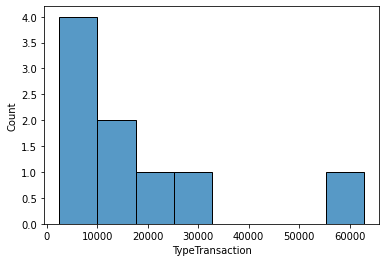

In [66]:
import seaborn as sns

sns.histplot( x=test1["TypeTransaction"] )

<AxesSubplot:xlabel='AmountDollar'>

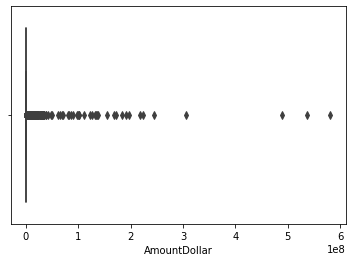

In [67]:
import seaborn as sns

sns.boxplot(x=data["AmountDollar"])

In [69]:
data.to_csv('Transactions_clean.csv')